In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_rows', 50)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('train.csv')

In [39]:
data.loc[data['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_m
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,B,11,3097,0,NaN,0,0,B,268394.744389,1938.880408
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,B,9,1892,0,NaN,0,1,B,302211.260887,1419.282909
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,...,B,9,1892,0,NaN,0,1,B,98129.976788,2348.119347
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,...,B,30,6207,1,1183.0,1,0,B,217009.338463,4385.488771
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,212864.799112,2612.112170
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,B,2,469,0,NaN,0,0,B,126596.941798,53253.578837
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,B,43,8429,3,NaN,3,9,B,158998.110646,4108.784399
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,...,B,9,1892,0,NaN,0,1,B,219281.918007,2498.580012


In [3]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [4]:
train,valid=train_test_split(data,test_size=0.3, random_state=42)

In [5]:
scaler=MinMaxScaler()

In [6]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','Price']])

C:\Users\marty\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
train_scaled

array([[0.9537037 , 0.05160481],
       [0.60185185, 0.26010927],
       [0.68518519, 0.2163305 ],
       ...,
       [0.60185185, 0.34473041],
       [0.56481481, 0.21652363],
       [0.75      , 0.67597523]])

In [8]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

225.46454499391513
135.0556571036248
105.55772918874108
86.16288510705587
73.00245410902441
62.63449751551075
54.51530838164676
48.42185009504948


Text(0.5, 1.0, 'INERTIA')

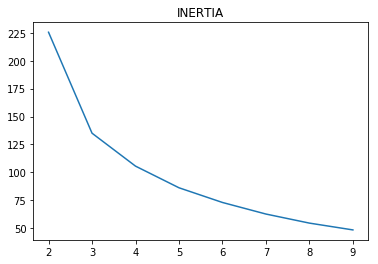

In [9]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model=AgglomerativeClustering(n_clusters=4)

In [12]:
train['cluster_year']=model.fit_predict(train_scaled)

C:\Users\marty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


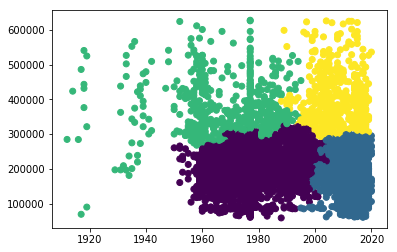

In [13]:
plt.scatter(train['HouseYear'],train['Price'],c=train['cluster_year'])

In [14]:
distr_info1=train['DistrictId'].value_counts().reset_index().rename(columns={"index":"DistrictId","DistrictId":'large_district'})

In [15]:
distr_info1

,DistrictId,large_district
0,27,574
1,1,466
2,23,394
3,6,355
4,9,222
5,62,175
6,30,160
7,53,133
8,58,118
9,21,107


[0, 200, 0, 5]

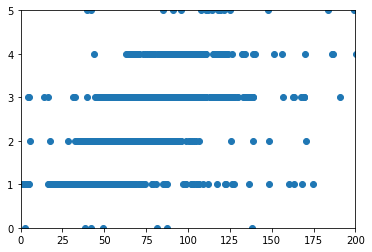

In [16]:
plt.scatter(data['Square'], data['Rooms'])
plt.axis([0,200,0,5])

In [17]:
mean_by_room = data.groupby('DistrictId').agg({'Price':'mean'})
mean_by_room = pd.merge(data['DistrictId'], mean_by_room['Price'], on = 'DistrictId', how = 'outer')
mean_by_room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
DistrictId    10000 non-null int64
Price         10000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 234.4 KB


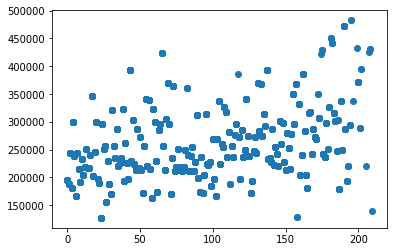

In [18]:
plt.scatter(mean_by_room['DistrictId'],mean_by_room['Price'])

In [19]:
data.loc[data['DistrictId']==5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
56,10065,5,2.0,54.477432,31.149444,7.0,14,22.0,1991,0.150818,B,B,16,3433,4,2643.0,4,5,B,279119.913422
518,8967,5,1.0,43.934580,17.448044,10.0,7,17.0,2019,0.150818,B,B,16,3433,4,2643.0,4,5,B,256252.283371
1194,13627,5,1.0,35.550065,20.685067,7.0,2,14.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,196094.775997
1291,16609,5,2.0,52.666249,29.400754,7.0,16,22.0,1985,0.150818,B,B,16,3433,4,2643.0,4,5,B,253675.463840
1349,771,5,1.0,39.023292,20.908958,8.0,10,14.0,1987,0.150818,B,B,16,3433,4,2643.0,4,5,B,195198.343516
1670,3779,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,B,B,16,3433,4,2643.0,4,5,B,158433.168775
2178,350,5,1.0,33.492714,20.055743,5.0,3,1.0,1963,0.150818,B,B,16,3433,4,2643.0,4,5,B,128758.093005
2816,4842,5,2.0,44.408977,26.716904,6.0,2,5.0,1966,0.150818,B,B,16,3433,4,2643.0,4,5,B,188350.645702
2837,10660,5,2.0,79.025250,NaN,10.0,11,20.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,428767.264304
3018,14465,5,1.0,45.989250,5.137161,1.0,7,1.0,2015,0.150818,B,B,16,3433,4,2643.0,4,5,B,282277.505656


In [20]:
data['Price_m'] = data['Price'] / data['Square']
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_m
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,3854.958571
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,4567.491245
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,4915.149522
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,3291.591637
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,3788.892642


In [24]:
mean_by_room = data.groupby('DistrictId').agg({'Price_m':'mean'})
mean_by_room = mean_by_room.rename(columns={'Price_m':'Price_m_mean'})
mean_by_room = pd.merge(data, mean_by_room['Price_m_mean'], on = 'DistrictId', how = 'outer')
mean_by_room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
Price_m          10000 non-null float64
Price_m_mean     10000 non-null float64
dtypes: float64(10), int64(9), obje

In [26]:
train,valid=train_test_split(mean_by_room,test_size=0.3, random_state=42)
train_scaled=scaler.fit_transform(train.loc[:,['DistrictId','Price_m_mean']])

C:\Users\marty\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
inertia_arr=[]
for i in range(2,15):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

204.44490205591984
134.34025685189948
101.74922539460096
78.04893907189279
62.44350079214861
51.671445736279104
43.566616822867374
36.464274966267766
32.99576692395023
28.67914119267222
25.82449217063793
23.015784542004397
21.11399116782877


Text(0.5, 1.0, 'INERTIA')

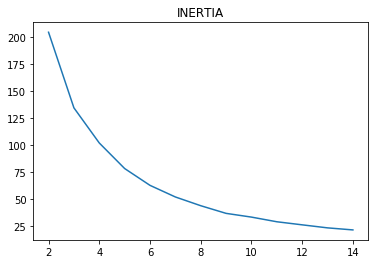

In [31]:
plt.plot([i for i in range(2,15) ],inertia_arr)
plt.title('INERTIA')

In [33]:
model=AgglomerativeClustering(n_clusters=6)

In [34]:
train['cluster_m']=model.fit_predict(train_scaled)

C:\Users\marty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


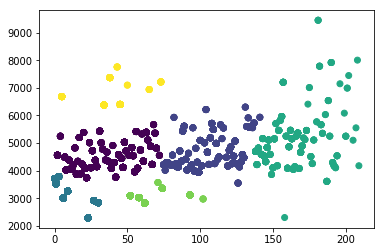

In [35]:
plt.scatter(train['DistrictId'],train['Price_m_mean'],c=train['cluster_m'])

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 23 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5529 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3656 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
Price_m          7000 non-null float64
Price_m_mean     7000 non-null float64
cluster_m        7000 non-null int64
dtypes: float64(

In [37]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6252 to 4705
Data columns (total 22 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       2358 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null object
Ecology_3        3000 non-null object
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     1546 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Shops_2          3000 non-null object
Price            3000 non-null float64
Price_m          3000 non-null float64
Price_m_mean     3000 non-null float64
dtypes: float64(10), int64(9), object(3)
memory usage

In [38]:
train=dummies(train)

NameError: name 'dummies' is not defined